This is my first Notebook in Kaggle, This code is inspired by the https://www.kaggle.com/sinakhorami/titanic-best-working-classifier notebook

## Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/home/mo/anaconda3/envs/ml35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/mo/anaconda3/envs/ml35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/mo/anaconda3/envs/ml35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Importing train data test pandas DataFrame

In [2]:
# os.listdir('../')

# Importing train dataset
train = pd.read_csv('./train.csv')

# To see the no of rows and columns in the dataframe
print(train.shape)

# Describe dataframe to see more information about the data and missing values
train.describe() # train_df.info() also can be used

#  We can notice DF total have 891 rows and Age is missing in some rows

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Importing testing dataset
test = pd.read_csv('./test.csv')

print(test.shape)
print(test.info())

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [4]:
# Printig some rows from train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Visualization to understand the data

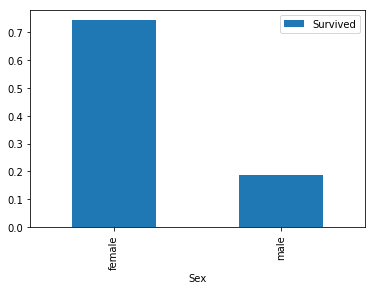

In [5]:
sex_plt = train.pivot_table(index='Sex', values='Survived')
sex_plt.plot.bar()

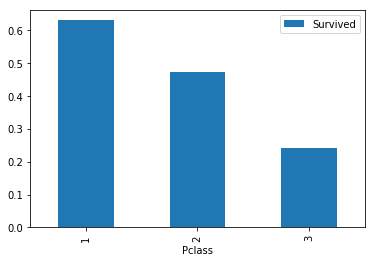

In [6]:
sex_plt = train.pivot_table(index='Pclass', values='Survived')
sex_plt.plot.bar()
# As you can see, If passenger is women or passenger belongs to 1st class has better chance of surviving

### Checking If DataFrame has any missing Data

In [7]:
# Data missing for Age in the train dataset
print(train.shape)
display(train.describe())

# Using pandas.fillna method to fill the NaN values using Age mean
train['Age'].fillna(train.Age.mean(), inplace=True)

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking If Data frame has any missing Data and filling

In [8]:

print(test.shape)
display(test.describe())

# Using pandas.fillna method to fill the NaN values using Fare median
test['Fare'].fillna(test.Fare.median(), inplace=True)
test['Age'].fillna(test.Age.mean(), inplace=True)

(418, 11)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Removing the features which are not impacting more on the Survival decission

In [9]:
# For Train data
drop_features = ['Name', 'PassengerId', 'Ticket', 'Cabin']
train = train.drop(drop_features, axis = 1)
train = pd.get_dummies(train, drop_first=True)

display(train.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [10]:
# For Test data
test = test.drop(drop_features, axis = 1)
test = pd.get_dummies(test, drop_first=True)
display(test.head())

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


### Creating OneHotEncoder using pandas get_dummies - since machine learning handles only with numbers

In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


### Now we have Final train data is ready, Lets start train out models

In [12]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Lets use multiple algorithms for training and select the best out of it

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss

### Importing different Classifier Algorithams

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

/home/mo/anaconda3/envs/ml35/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

In [16]:
log_cols = ['Classifier', 'Accuracy']
log = pd.DataFrame(columns=log_cols)

In [17]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

print("X ", X.shape)
print("y ", y.shape)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        
        y_prediction = clf.predict(X_test)
        acc = accuracy_score(y_test, y_prediction)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

X  (891, 8)
y  (891,)


In [18]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    

In [19]:
plt.xlabel = "Accuracy"
plt.title = "Clasifier Accurcy"

sns.set_color_codes("muted")

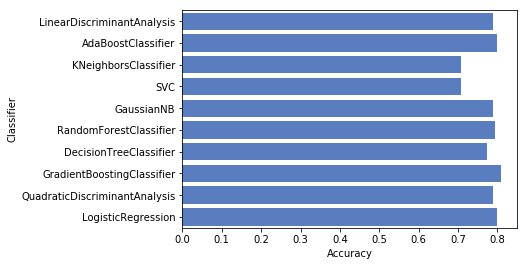

In [20]:
sns.barplot(x="Accuracy", y="Classifier", data=log, color="b")

### GradientBoostingClassifier is the winner here
I noticed that *GradientBoostingClassifier* is working better with this data and we use this Classifier to predict

In [21]:
output_cols = ['PassengerId', 'Survived']

high_acc_clf = GradientBoostingClassifier()
high_acc_clf.fit(X, y)

y_pred = high_acc_clf.predict(test.values)
y_pred

test_data = pd.read_csv('./test.csv')
data = {
    "PassengerId": test_data.PassengerId,
    "Survived": y_pred
}
data
new_df = pd.DataFrame(data)
new_df.to_csv('./prediction.csv', index=False)